# <font color='green'>Series de tiempo</font>
### Profesor: Act Fernando Ortega  
###  Curso : DATA SCIENCE AND MACHINE LEARNING APPLIED TO FINANCIAL MARKETS  

# Importación de las librerías necesarias

In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt  # Renombrar pyplot a plt es más estándar
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller

import warnings


# Suprimir los warnings
warnings.filterwarnings("ignore")


## leer archivos

In [2]:
# Intentar leer el archivo usando una codificación alternativa en caso de error con 'utf-8'
try:
    series = read_csv('PIB.csv', header=0, index_col=0, encoding='utf-8')
except UnicodeDecodeError:
    # Si hay un error de codificación, intentar con 'ISO-8859-1'
    series = read_csv('PIB.csv', header=0, index_col=0, encoding='ISO-8859-1')



In [ ]:
series

### limpieza

### Na´s 

In [3]:
series.isna().sum()

Yt    0
dtype: int64

In [ ]:
#series.fillna(method="ffill") Si hay na´s

# Serie de tiempo

Una serie de tiempo es una secuencia de datos ordenados cronológicamente que representa observaciones de una variable en diferentes puntos temporales, generalmente a intervalos regulares. Sus principales propiedades incluyen tendencia, que es el comportamiento general a largo plazo; estacionalidad, que corresponde a patrones cíclicos recurrentes asociados con periodos específicos; y aleatoriedad, que refleja las fluctuaciones impredecibles. Además, las series de tiempo pueden presentar autocorrelación, donde los valores pasados influyen en los presentes, y estacionariedad, que implica que sus estadísticas no cambian a lo largo del tiempo, una propiedad esencial para muchos métodos de análisis.

### Procesos estocásticos

Un proceso estocástico es una colección de variables aleatorias indexadas en el tiempo (o en otro parámetro), que describe cómo un sistema evoluciona de manera probabilística. Cada realización del proceso es una posible trayectoria de los valores que la variable puede tomar a lo largo del tiempo, y su comportamiento depende de las distribuciones de probabilidad y las dependencias entre los valores en diferentes momentos.

Una serie de tiempo es estacionaria si sus propiedades estadísticas, como la media, la varianza y la autocorrelación, son constantes en el tiempo. Esto implica que el proceso generador de la serie no cambia su comportamiento a lo largo del tiempo, lo que facilita su modelado y predicción. Por el contrario, una serie no estacionaria presenta estadísticas que varían con el tiempo, como una tendencia creciente o fluctuaciones estacionales, y a menudo requiere transformaciones (como diferenciarla) para analizarla adecuadamente.

### Error aleatorio  
El error aleatorio de una serie de tiempo representa la parte impredecible o no explicada de los datos, que no puede ser modelada por componentes sistemáticas como la tendencia, la estacionalidad o la dependencia entre observaciones pasadas. Es el residuo que queda después de ajustar un modelo de serie de tiempo y se considera ruido inherente al proceso.  

Principales características del error aleatorio:  
* Media cero: Los errores aleatorios tienen, en promedio, un valor esperado de cero, es decir, E(et)=0, donde et es el error en el tiempo t.  
* Varianza constante: Los errores tienen una varianza constante a lo largo del tiempo (homocedasticidad).  
* No autocorrelación: No existe correlación entre los errores en diferentes puntos temporales, es decir, Cov(et,et-k)=0  
* Distribución normal (opcional): En muchos modelos, se asume que los errores siguen una distribución normal, especialmente en contextos donde se busca aplicar inferencia estadística.  
Un error aleatorio que cumpla estas características es esencial para validar la calidad de un modelo de serie de tiempo, ya que asegura que todas las dependencias significativas han sido capturadas por el modelo y que lo que resta es puro ruido.

#### Caminata aleatoria  
Una caminata aleatoria es un proceso estocástico en el cual cada valor de la serie se obtiene sumando un valor aleatorio al valor anterior. Matemáticamente, una caminata aleatoria puede expresarse como:  
$Y_t=Y_{t-1}+ e_t$

Características principales:  
* No estacionariedad: Una caminata aleatoria no es estacionaria, ya que la media y la varianza crecen con el tiempo. La varianza es proporcional al tiempo transcurrido (t), lo que la hace divergente a medida que $t→∞.$
* Dependencia acumulativa: Cada valor depende del valor previo más un componente aleatorio, lo que introduce una dependencia fuerte entre los valores a lo largo del tiempo.
* Tendencia aleatoria: Aunque no tiene una tendencia determinista, una caminata aleatoria puede mostrar trayectorias que parecen tener una dirección (hacia arriba o hacia abajo) debido a la acumulación de los errores aleatorios.
* Impredecibilidad: Es imposible predecir el próximo paso más allá de asumir que será igual al valor actual más un error aleatorio.  
Este modelo es común en finanzas para describir el movimiento de los precios de los activos, ya que captura su naturaleza impredecible y su sensibilidad a la información nueva.

## ARIMA
Un modelo ARIMA (AutoRegressive Integrated Moving Average) es una técnica estadística utilizada para modelar y predecir series de tiempo estacionarias y no estacionarias. Este modelo combina tres componentes clave para capturar las dinámicas de una serie de tiempo:  
* AR (Autoregresivo): Representa la dependencia entre un valor actual y sus valores pasados. Está caracterizado por un orden p, que indica cuántos valores previos se usan en el modelo.  
* I (Integrado): Indica el número de veces que la serie debe diferenciarse para volverse estacionaria. El orden d representa cuántas diferencias sucesivas se aplican.
* MA (Media móvil): Modela la dependencia entre el valor actual de la serie y los errores (ruido aleatorio) de observaciones pasadas. El orden q indica cuántos términos de error se incluyen.

### Características:
* Flexibilidad: Puede manejar tanto series estacionarias (d = 0) como no estacionarias (d > 0).
* Predicción: Es ampliamente usado para predecir valores futuros basándose en el comportamiento histórico de la serie.
* Requiere preprocesamiento: Antes de aplicar el modelo, es necesario verificar si la serie es estacionaria y determinar los valores óptimos de p, d, y q, típicamente usando métodos como gráficos de autocorrelación (ACF) y autocorrelación parcial (PACF).

Extensión:  
El modelo ARIMA puede extenderse a SARIMA (Seasonal ARIMA) para manejar componentes estacionales, lo que incluye parámetros adicionales para capturar patrones periódicos.

## ACF
La ACF (Autocorrelation Function) es una herramienta estadística que mide el grado de correlación entre una serie de tiempo y versiones desplazadas de sí misma en diferentes retardos (k). En términos simples, evalúa cómo los valores pasados (X t−k) están relacionados con los valores presentes (X t) para diferentes lags (k).El resultado de la ACF se representa gráficamente, mostrando los valores de correlación para diferentes lags (k).  

### Relación con ARIMA:
Identificación de d (diferenciación):  
Antes de aplicar ARIMA, es necesario verificar si la serie es estacionaria. Si la ACF decrece lentamente o no se estabiliza, esto indica que la serie no es estacionaria, y es posible que necesite diferenciarse (d>0).  

Identificación de q (media móvil):  
La ACF es clave para determinar el orden q del componente MA. En particular, un modelo MA(q) muestra un corte abrupto en la ACF después del lag q, donde los valores de autocorrelación caen a cero.  

Complemento del PACF:  
En modelos ARIMA, la ACF se utiliza junto con la función de autocorrelación parcial (PACF) para determinar el orden p del componente AR y el orden q del componente MA. Mientras que la ACF analiza correlaciones generales, la PACF identifica correlaciones directas entre los valores.



#### Usos principales de la ACF:
* Estacionariedad: Identificar si la serie es estacionaria observando el comportamiento de la autocorrelación. En una serie estacionaria, la ACF se desvanece rápidamente hacia cero.
* Identificación de parámetros: Ayuda a elegir q (orden de MA) y a confirmar si la diferenciación fue suficiente.
* Diagnóstico del modelo: Después de ajustar un modelo ARIMA, la ACF de los residuos debe mostrar que no hay correlaciones significativas, indicando que el modelo capturó las dependencias de la serie.
* El análisis de la ACF es fundamental en el proceso de ajuste de un modelo ARIMA, ayudando a garantizar que el modelo sea adecuado y efectivo para describir y predecir la serie de tiempo.

## PACF

La PACF (Partial Autocorrelation Function) mide la correlación directa entre una serie de tiempo y sus valores en un retardo específico (k), eliminando la influencia de los valores intermedios. Es útil para identificar relaciones lineales puras entre un punto en el tiempo y otro, sin la interferencia de correlaciones indirectas.

Representación:
La PACF se visualiza en un gráfico donde el eje x representa los retardos (k) y el eje y las correlaciones parciales. Un corte abrupto indica los retardos significativos, mientras que valores cercanos a cero sugieren ausencia de correlación directa.

### Relación con ARIMA:  
* Identificación de p (autoregresión):
La PACF es fundamental para determinar el orden p del componente AR en un modelo ARIMA. Un modelo AR(p) presenta un corte en la PACF después del lag p, es decir, las correlaciones parciales más allá de p son insignificantes.

* Complemento de la ACF:
Mientras que la ACF ayuda a identificar q (orden de MA), la PACF se usa para encontrar p. Ambas funciones juntas son esenciales para seleccionar los parámetros correctos del modelo.

* Estacionariedad y diferenciación (d):
La PACF también se usa para verificar si la serie es estacionaria. Si hay una disminución lenta en la PACF, puede indicar que la serie necesita diferenciarse (d>0).

### Usos principales de la PACF:
* Identificación de p: Determina cuántos retardos pasados son relevantes para modelar el componente AR del modelo ARIMA.
* Validación del modelo: Ayuda a evaluar si un modelo ARIMA ajustado describe correctamente los datos. Si el modelo es adecuado, la PACF de los residuos no muestra correlaciones significativas.
* Diagnóstico de estructura: Identifica relaciones directas entre valores en diferentes tiempos, ignorando correlaciones indirectas.

#### Diferencia clave entre ACF y PACF:  
* La ACF mide correlaciones generales, considerando tanto relaciones directas como indirectas.
* La PACF mide correlaciones directas, eliminando las influencias de valores intermedios.


# Validar estacionariedad

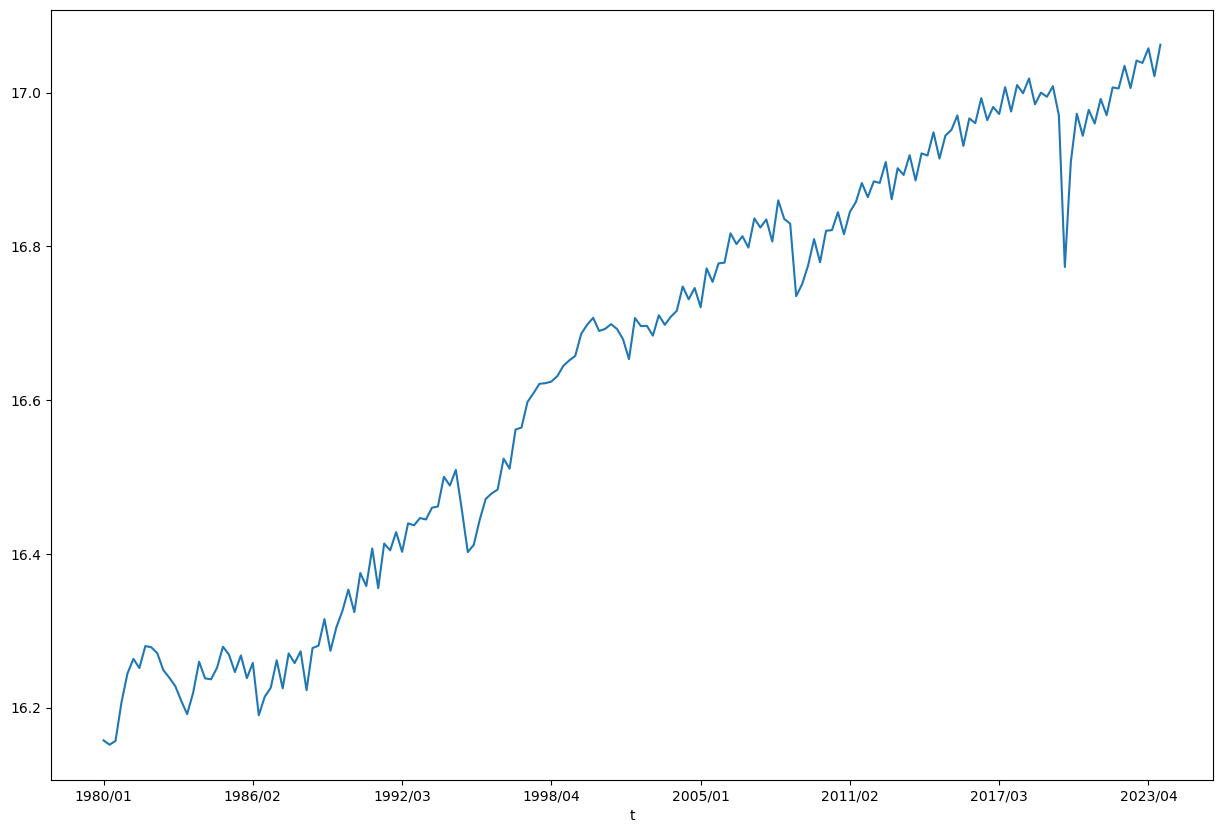

In [4]:
# Graficar la serie temporal

plt.figure(figsize=(15,10))

series.iloc[:,0].plot()
plt.show()  # Asegurarse de mostrar la gráfica


## Validar con dickey fuller estacionariedad

La prueba de Dickey-Fuller (o prueba ADF, por Augmented Dickey-Fuller) es una prueba estadística utilizada para determinar si una serie de tiempo es estacionaria. Se basa en evaluar si una serie tiene una raíz unitaria, lo que implica que es no estacionaria y presenta una tendencia aleatoria o dependencia en el tiempo.    
* Hipótesis nula (Ho): La serie tiene una raíz unitaria, es decir, no es estacionaria.
* Hipótesis alternativa (H1): La serie es estacionaria, lo que implica que no tiene una raíz unitaria.  
Resultados:
* Si se rechaza Ho: La serie es estacionaria.
* Si no se rechaza Ho: La serie no es estacionaria, lo que sugiere que puede necesitar diferenciación para ser modelada adecuadamente.

In [5]:
X = series.values

result = adfuller(X, maxlag=1, regression="ct", autolag="AIC")   # maxlag  resagoz /// regression tipo de regresion  n=none
                                                                                        #c constante  ct const y tendencia
                                                                                        # autolag metodo de calib

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.671803
p-value: 0.247976


In [ ]:
result

## Funciones de autocorrelación

###   ACF

Text(0.5, 1.0, 'Autocorrelación (ACF)')

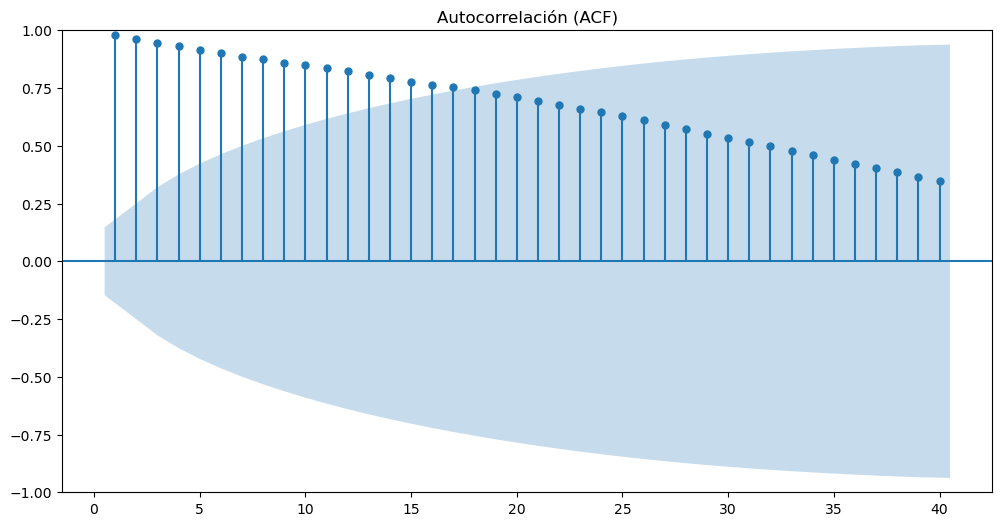

In [6]:
# Graficar la autocorrelación (ACF) y autocorrelación parcial (PACF)
plt.figure(figsize=(12, 6))

# Autocorrelación (ACF)
plot_acf(series, lags=40, ax=plt.gca(),zero=False)
plt.title('Autocorrelación (ACF)')

### PACF

Text(0.5, 1.0, 'Autocorrelación Parcial (PACF)')

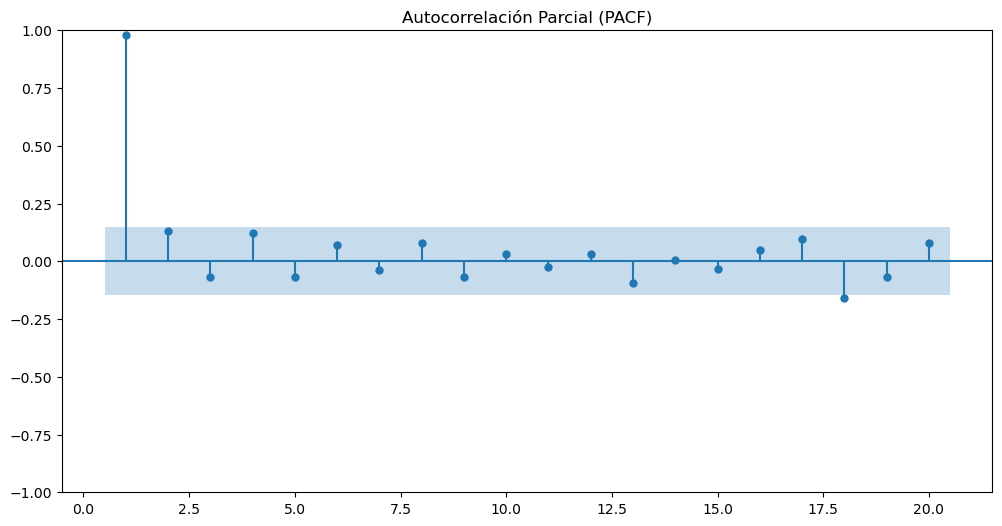

In [7]:
# Autocorrelación parcial (PACF)
plt.figure(figsize=(12, 6))

plot_pacf(series, lags=20, ax=plt.gca(), method='ywm',zero=False)
plt.title('Autocorrelación Parcial (PACF)')

### tenemos que diferenciar si hay raiz unitaria


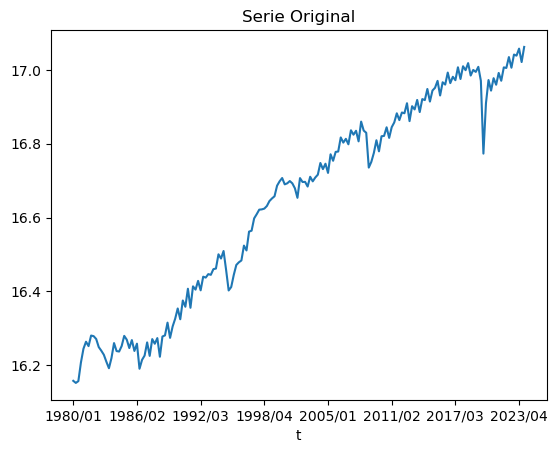

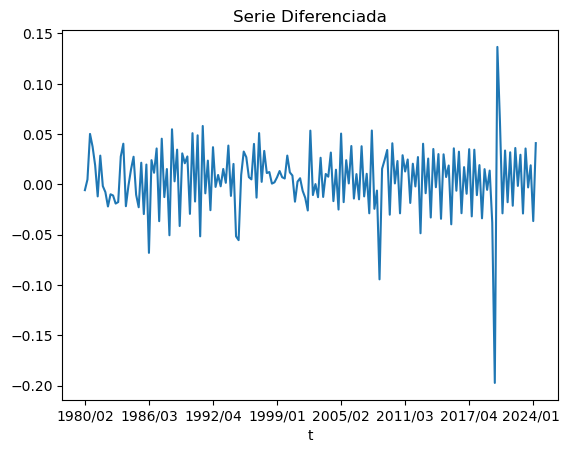

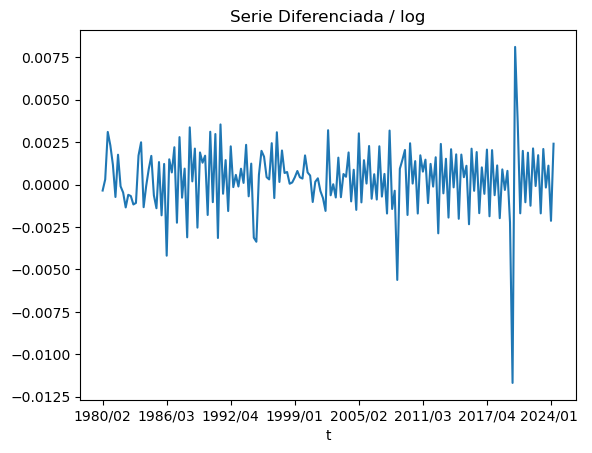

In [8]:
# Graficar la serie original
series.iloc[:,0].plot(title="Serie Original")
plt.show()

# Diferenciar la serie temporal (primera diferencia)
series_diff = series.diff().dropna()

# Graficar la serie diferenciada
series_diff.iloc[:,0].plot(title="Serie Diferenciada")
plt.show()


# Graficar la serie diferenciada y con log
np.log(series).diff().dropna().iloc[:,0].plot(title="Serie Diferenciada / log")
plt.show()





### Aplicamos DFuller a la serie diferenciada

In [9]:

from statsmodels.tsa.stattools import adfuller

X_dif = np.log(series).diff().dropna().iloc[:,0]

result_dif = adfuller(X_dif, maxlag=1, regression="n", autolag="AIC")   # maxlag  resagoz /// regression tipo de regresion  n=none
                                                                                        #c constante  ct const y tendencia
                                                                                        # autolag metodo de calib


        
# Mostrar los resultados de la prueba ADF
print('ADF Statistic: %f' % result_dif[0])
print('p-value: %f' % result_dif[1])
print('Número de rezagos usados: %d' % result_dif[2])
print('Número de observaciones usadas para la prueba ADF: %d' % result_dif[3])
print('Valores críticos:')
for key, value in result_dif[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.097650
p-value: 0.000000
Número de rezagos usados: 0
Número de observaciones usadas para la prueba ADF: 176
Valores críticos:
	1%: -2.579
	5%: -1.943
	10%: -1.615


### ACF

Text(0.5, 1.0, 'Autocorrelación (ACF)')

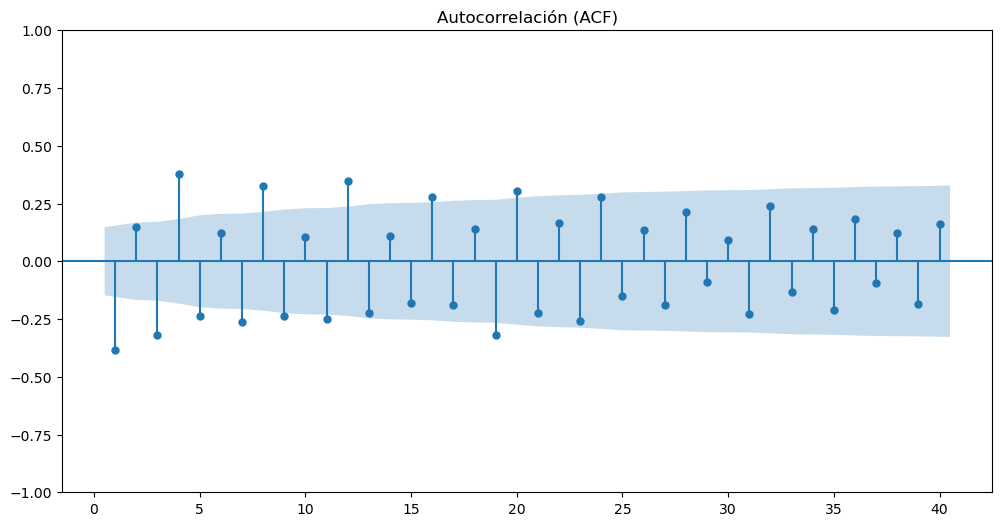

In [10]:
# Graficar la autocorrelación (ACF) y autocorrelación parcial (PACF)
plt.figure(figsize=(12, 6))

# Autocorrelación (ACF)
plot_acf(X_dif, lags=40, ax=plt.gca(),zero=False)
plt.title('Autocorrelación (ACF)')

### Parcial  PACF

Text(0.5, 1.0, 'Autocorrelación Parcial (PACF)')

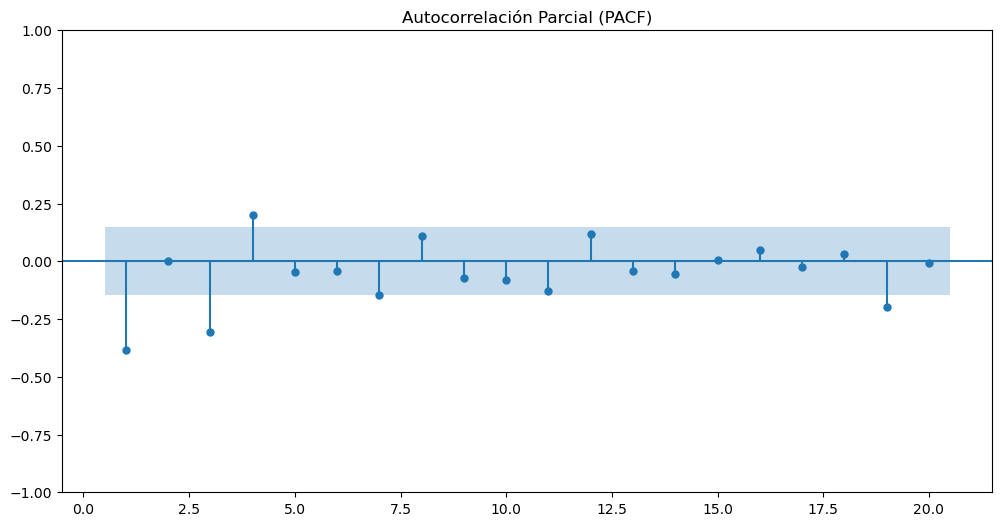

In [11]:
# Autocorrelación parcial (PACF)
plt.figure(figsize=(12, 6))

plot_pacf(X_dif, lags=20, ax=plt.gca(), method='ywm',zero=False)
plt.title('Autocorrelación Parcial (PACF)')

### Seleccion autoarima

## B-J paso 2

In [12]:
from pmdarima.arima import auto_arima
from pmdarima.arima import AutoARIMA

In [13]:
from pmdarima.arima import ADFTest

In [14]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)

adf_test.should_diff(X_dif)

(0.01, False)

In [16]:
len(X_dif)

177

In [17]:
X_dif[:167]

t
1980/02   -0.000352
1980/03    0.000301
1980/04    0.003102
1981/01    0.002315
1981/02    0.001172
             ...   
2020/04    0.003706
2021/01   -0.001694
2021/02    0.001987
2021/03   -0.001043
2021/04    0.001880
Name: Yt, Length: 167, dtype: float64

In [ ]:
len(X_dif)

Text(0.5, 0, 'Year')

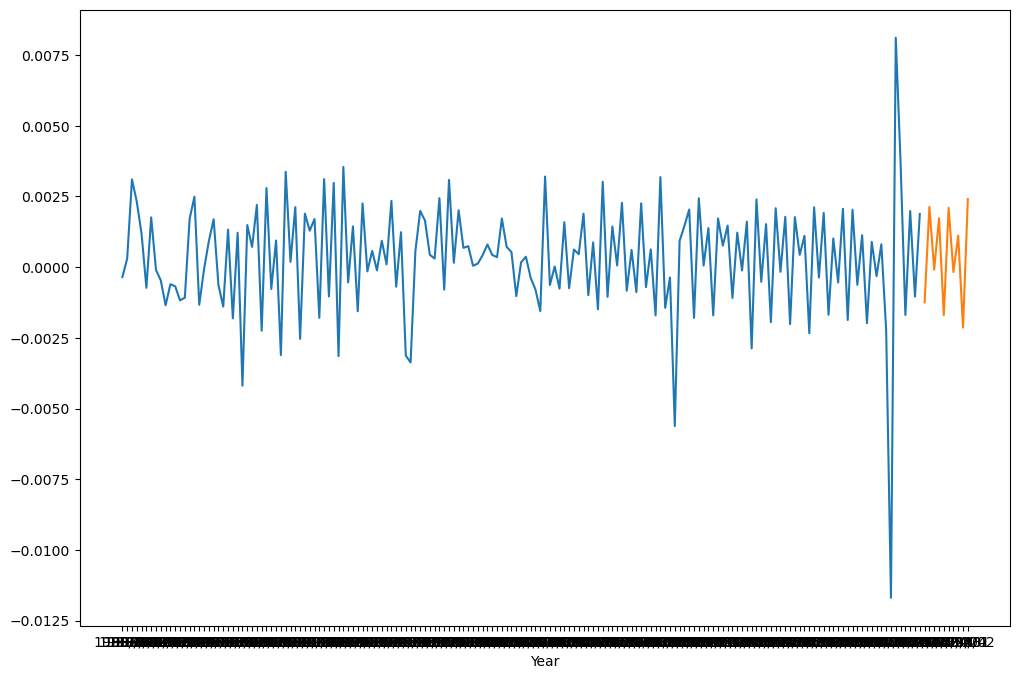

In [18]:
## dividimos en train test
#Spliting the dataset into train and test

train = X_dif[:167]
test = X_dif[167:]

train.tail()
test.head()

plt.figure(figsize=(12,8))
plt.plot(train)

plt.plot(test)
plt.xlabel('Year')


In [ ]:
"""arima_model =  auto_arima(train,start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=1, 
                          D=1, start_Q=1, max_P=5, max_D=5,
                          max_Q=5, m=4, seasonal=True, 
                          error_action='ignore',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )
AutoARIMA()"""

In [19]:
arima_model =  auto_arima(train,start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=5, max_q=5, seasonal=False, 
                          error_action='ignore',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20)
AutoARIMA()


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1595.726, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1613.972, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1612.346, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1612.232, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1613.398, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1609.941, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1619.706, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1597.473, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1617.710, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1617.771, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1620.219, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1617.551, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1620.019, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.221 seconds


AutoARIMA()

In [20]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  167
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 813.110
Date:                Mon, 13 Jan 2025   AIC                          -1620.219
Time:                        19:57:28   BIC                          -1610.865
Sample:                             0   HQIC                         -1616.423
                                - 167                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      2.544      0.011    6.75e-05       0.001
ma.L1         -0.3616      0.063     -5.706      0.000      -0.486      -0.237
sigma2      3.434e-06   1.77e-07     19.407      0.000    3.09e-06    3.78e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):              1305.96
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               2.17   Skew:                            -2.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:

prediction = pd.DataFrame(arima_model.predict(n_periods = 10))
prediction.columns = ['predicted_yt']
prediction

,predicted_yt
167,-0.000179
168,0.000294
169,0.000294
170,0.000294
171,0.000294
172,0.000294
173,0.000294
174,0.000294
175,0.000294
176,0.000294


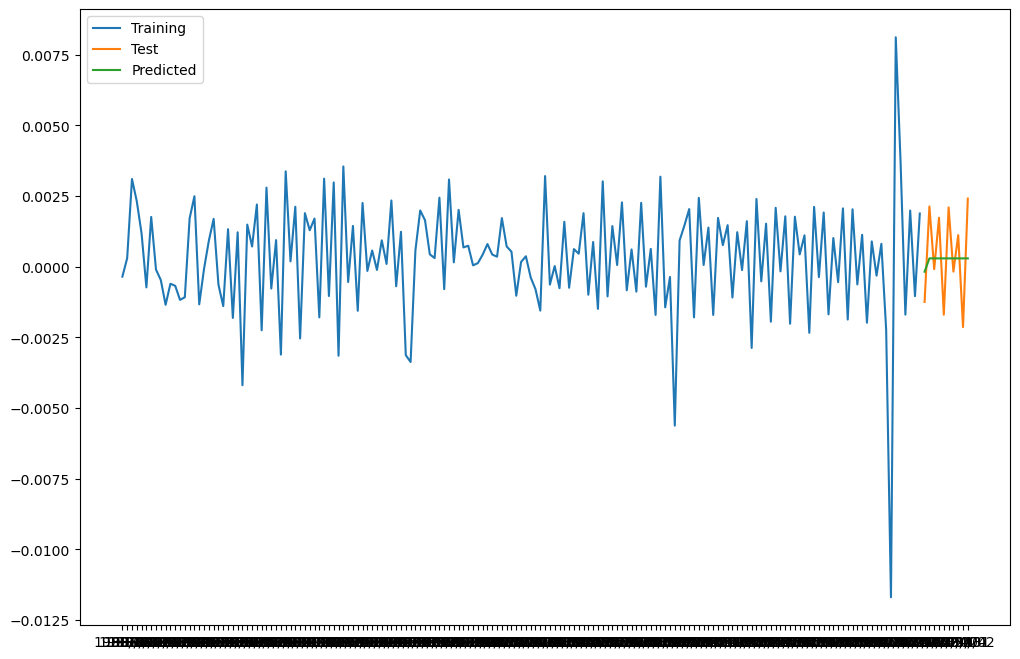

In [22]:

plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'best')
plt.show()



In [ ]:
arima_model.plot_diagnostics(figsize=(14,10))

### ajustar ARIMA

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
"""# Ajustar el modelo ARIMA

modelo = SARIMAX(train, order=(1,0,0),seasonal_order=(0,1,1, 4))
ajuste = modelo.fit()
"""

In [25]:
# Ajustar el modelo ARIMA

modelo = SARIMAX(train, order=(0,0,1), trend='c')
ajuste = modelo.fit()

In [26]:
# Resumen del ajuste
print(ajuste.summary())

                               SARIMAX Results                                
Dep. Variable:                     Yt   No. Observations:                  167
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 813.110
Date:                Mon, 13 Jan 2025   AIC                          -1620.219
Time:                        20:05:36   BIC                          -1610.865
Sample:                             0   HQIC                         -1616.423
                                - 167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      2.544      0.011    6.75e-05       0.001
ma.L1         -0.3616      0.063     -5.706      0.000      -0.486      -0.237
sigma2      3.434e-06   1.77e-07     19.407      0.0

In [27]:
# Predecir los próximos 10 periodos

prediccion = ajuste.get_forecast(steps=10)
prediccion_valores = prediccion.predicted_mean
intervalos_confianza = prediccion.conf_int()  # Intervalos de confianza

print(prediccion_valores)
print(intervalos_confianza)

167   -0.000179
168    0.000294
169    0.000294
170    0.000294
171    0.000294
172    0.000294
173    0.000294
174    0.000294
175    0.000294
176    0.000294
Name: predicted_mean, dtype: float64
     lower Yt  upper Yt
167 -0.003811  0.003453
168 -0.003568  0.004156
169 -0.003568  0.004156
170 -0.003568  0.004156
171 -0.003568  0.004156
172 -0.003568  0.004156
173 -0.003568  0.004156
174 -0.003568  0.004156
175 -0.003568  0.004156
176 -0.003568  0.004156


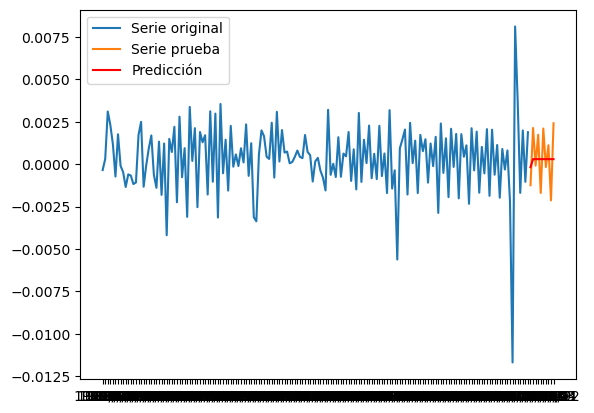

In [28]:

plt.plot(train, label='Serie original')

plt.plot(test, label='Serie prueba')
plt.plot(prediccion_valores, label='Predicción', color='red')
plt.legend()
plt.show()

## paréntesis

In [29]:
####
# Ajustar el modelo ARIMA

modelo2 = SARIMAX(train, order=(3,0,2), trend='n')
ajuste2 = modelo2.fit()

In [30]:
# Predecir los próximos 10 periodos

prediccion2 = ajuste2.get_forecast(steps=10)
prediccion_valores2 = prediccion2.predicted_mean


print(prediccion_valores2)


167   -0.002172
168    0.001563
169   -0.000852
170    0.000630
171   -0.000644
172    0.000547
173   -0.000363
174    0.000244
175   -0.000208
176    0.000182
Name: predicted_mean, dtype: float64


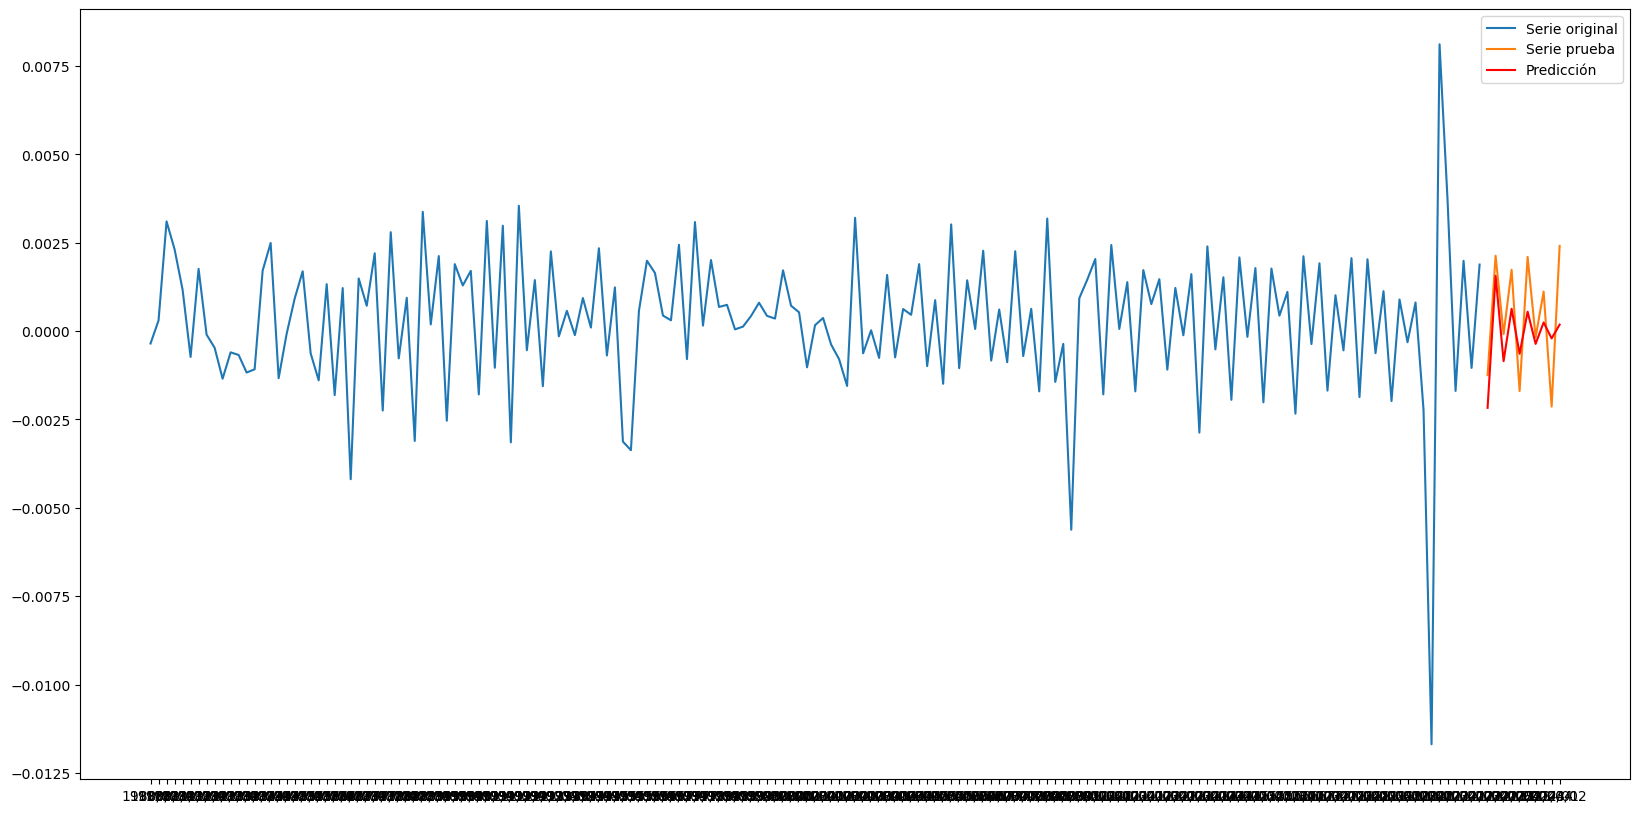

In [31]:
plt.figure(figsize=(20,10))
plt.plot(train, label='Serie original')

plt.plot(test, label='Serie prueba')
plt.plot(prediccion_valores2, label='Predicción', color='red')
plt.legend()
plt.show()

In [ ]:
test.values

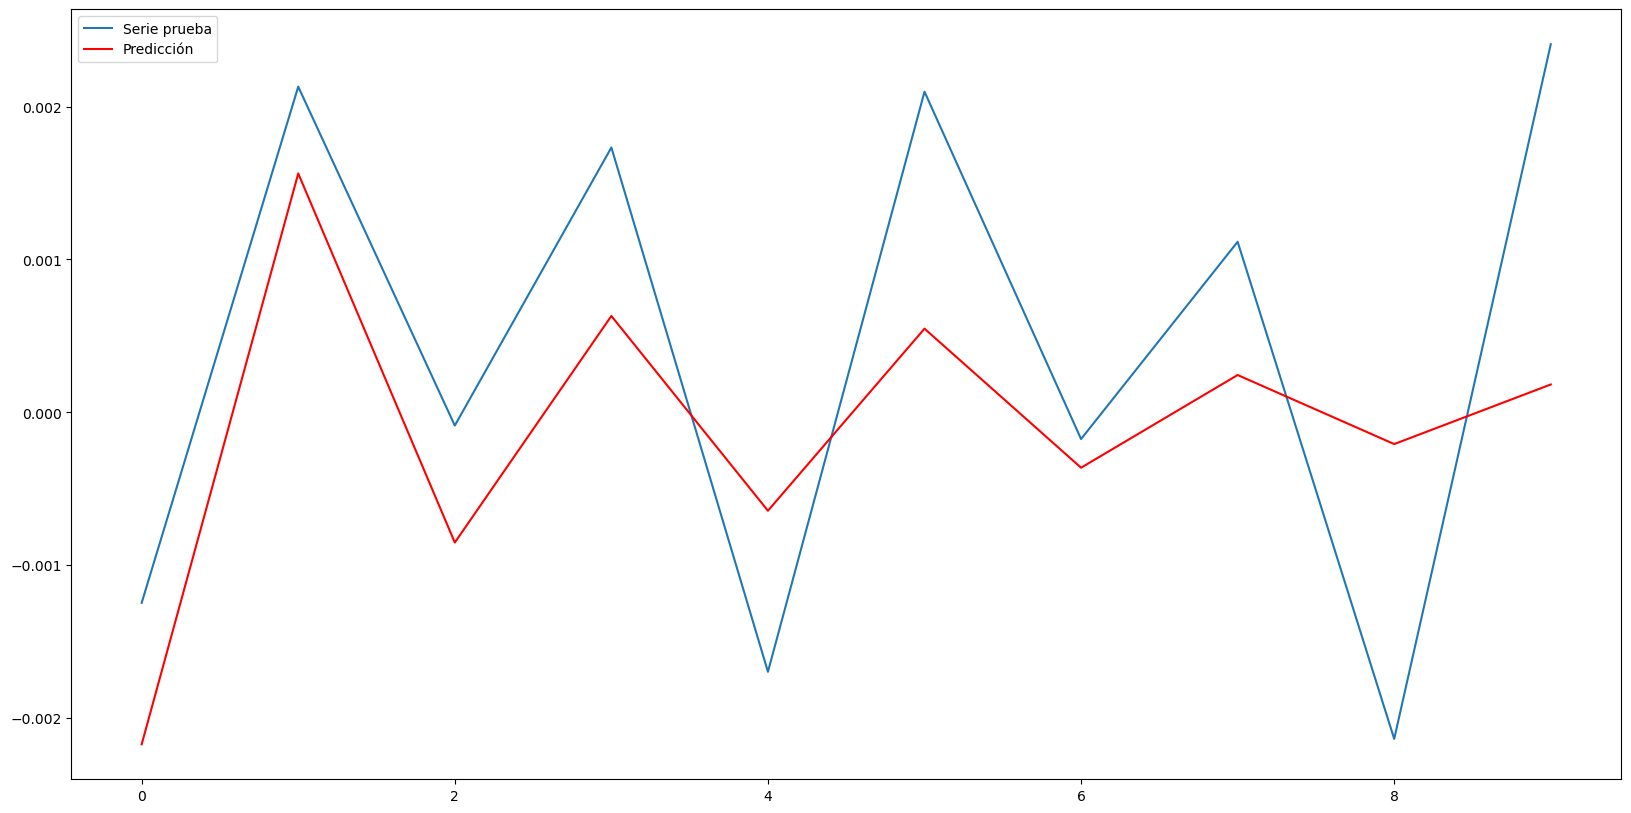

In [32]:
plt.figure(figsize=(20,10))


plt.plot(test.values, label='Serie prueba')
plt.plot(prediccion_valores2.values, label='Predicción', color='red')
plt.legend()
plt.show()

### Tarea: evaluar los residuos del modelo mas complejo

In [33]:
# Obtener los residuos del ajuste
residuos = ajuste.resid
print(residuos)

t
1980/02   -0.000646
1980/03   -0.000200
1980/04    0.002736
1981/01    0.003008
1981/02    0.001965
             ...   
2020/04    0.004558
2021/01   -0.000341
2021/02    0.001569
2021/03   -0.000769
2021/04    0.001308
Length: 167, dtype: float64


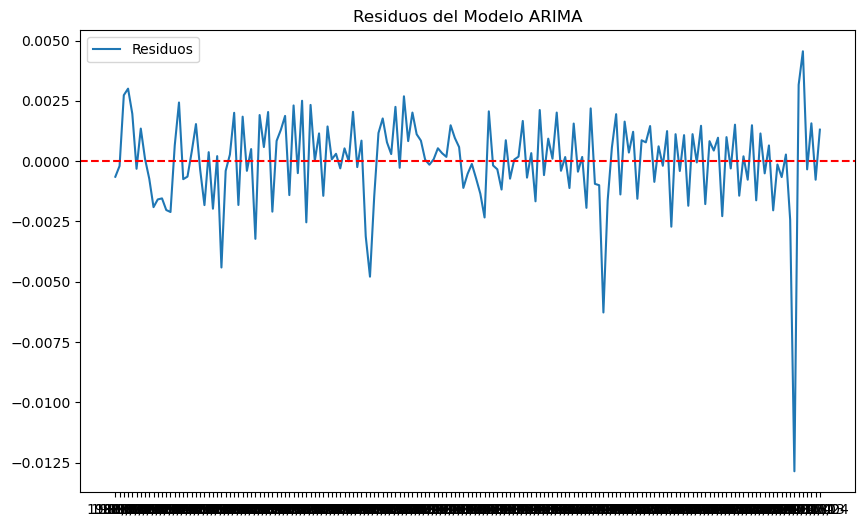

In [34]:
# Gráfico de los residuos
plt.figure(figsize=(10, 6))
plt.plot(residuos, label="Residuos")
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.title("Residuos del Modelo ARIMA")
plt.show()

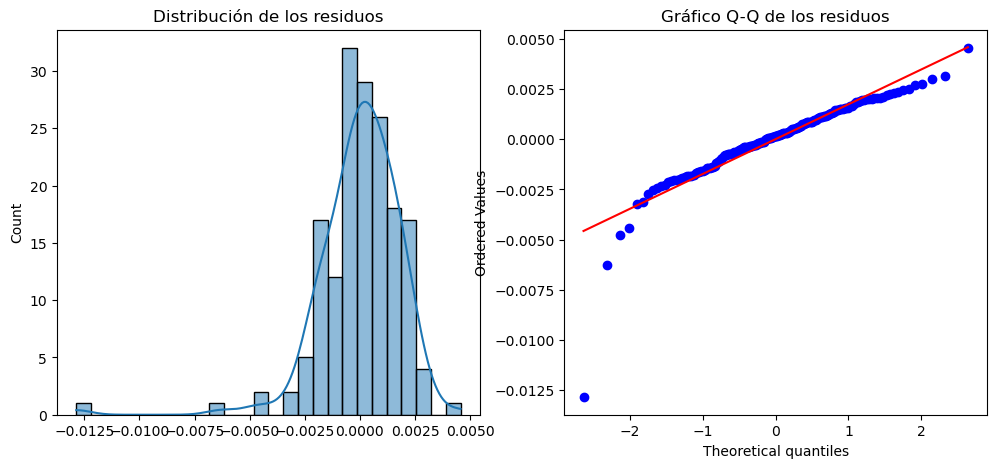

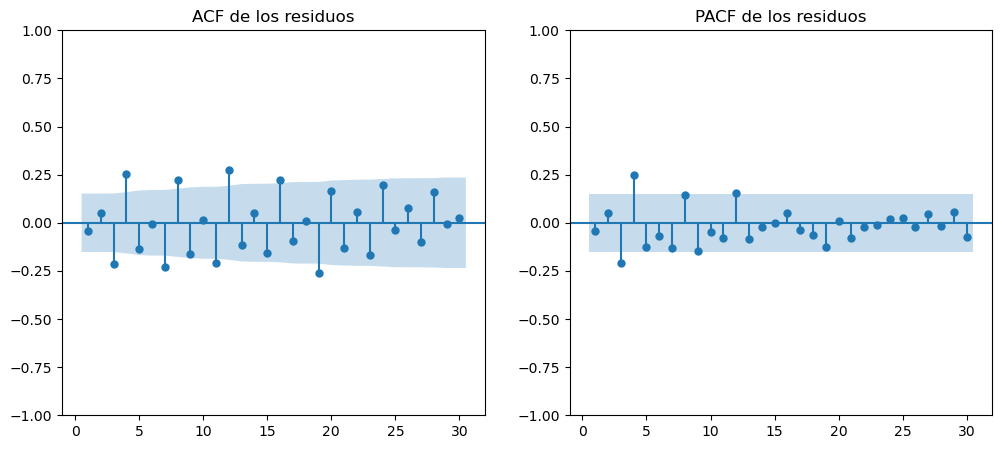

In [35]:
import seaborn as sns
import scipy.stats as stats

# Histograma y gráfico Q-Q para verificar normalidad
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True)
plt.title("Distribución de los residuos")

plt.subplot(1, 2, 2)
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de los residuos")
plt.show()

# Gráficos de autocorrelación (ACF y PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(residuos, ax=plt.gca(), lags=30,zero=False)
plt.title("ACF de los residuos")

plt.subplot(1, 2, 2)
plot_pacf(residuos, ax=plt.gca(), lags=30,zero=False)
plt.title("PACF de los residuos")
plt.show()

In [36]:
# Calcular la media y desviación estándar de los residuos
media_residuos = residuos.mean()
desviacion_residuos = residuos.std()

# Estandarizar los residuos
residuos_estandarizados = (residuos - media_residuos) / desviacion_residuos

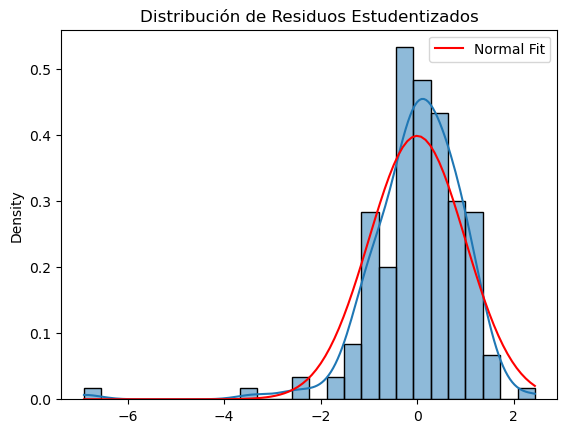

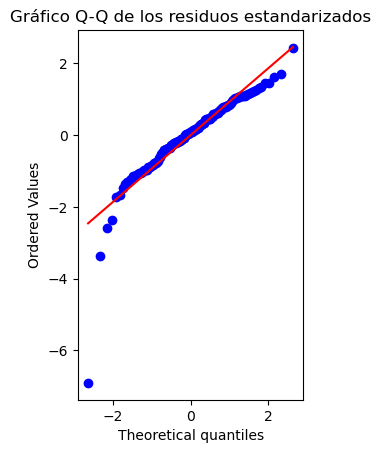

In [37]:
import scipy.stats as stats
# Histograma de los residuos estudentizados

sns.histplot(residuos_estandarizados, kde=True, stat="density")
xfit = np.linspace(min(residuos_estandarizados), max(residuos_estandarizados), 100)
yfit = norm.pdf(xfit)
plt.plot(xfit, yfit, 'r-', label='Normal Fit')
plt.title("Distribución de Residuos Estudentizados")
plt.legend()
plt.show()

# Gráfico Q-Q para comparar con una distribución normal
plt.subplot(1, 2, 2)
stats.probplot(residuos_estandarizados, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de los residuos estandarizados")
plt.show()

### Pruebas al error

#### Normalidad

In [40]:
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan

In [41]:
### JARQUE BERA

# Normalidad en los residuos
jb_test = jarque_bera(residuos)
print("Jarque-Bera Test:", jb_test)

## estadistica //// p value   /// Asime   // kurto
## HO : normalidad
#  HA : no normalidad



Jarque-Bera Test: (1305.0341881470586, 4.125026057678482e-284, -2.253334632832709, 15.932121078005363)


#### independencia de error

In [42]:
## independencia de error

# Prueba de independencia de los errores (Durbin-Watson)
dw_test = sm.stats.durbin_watson(residuos)
print("Durbin-Watson Test:", dw_test)

Durbin-Watson Test: 2.079894353569214


In [45]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Usar la función Ljung-Box para comprobar la autocorrelación
ljung_box_test = acorr_ljungbox(residuos, lags=1)  # Lags=1 es para una lag de primer orden

# Hipótesis nula (Ho): No hay autocorrelación en los residuos.
# Hipótesis nula (H1):  hay autocorrelación en los residuos.

In [46]:
ljung_box_test

,lb_stat,lb_pvalue
1,0.297079,0.585719


#### Pruebas de heterocedasticidad

In [47]:
# Prueba de heterocedasticidad (Breusch-Pagan)

#Hipótesis nula (Ho): No hay heterocedasticidad, es decir, la varianza de los errores es constante (homocedasticidad).
#Hipótesis alternativa (H1)Hay heterocedasticidad, es decir, la varianza de los errores no es constante.
X_sm = sm.add_constant(train.values)


bp_test = het_breuschpagan(residuos, X_sm )

# Extraer los resultados
lm_stat = bp_test[0]        # Estadístico de LM
lm_pvalue = bp_test[1]      # Valor p asociado al estadístico de LM
f_stat = bp_test[2]         # Estadístico F
f_pvalue = bp_test[3]       # Valor p asociado al estadístico F

print("Estadístico LM:", lm_stat)
print("Valor p de LM:", lm_pvalue)
print("Estadístico F:", f_stat)
print("Valor p de F:", f_pvalue)


Estadístico LM: 40.789704788709706
Valor p de LM: 1.6952383661588158e-10
Estadístico F: 53.32608785099359
Valor p de F: 1.1405791752341246e-11


In [ ]:
from statsmodels.stats.diagnostic import het_white

In [ ]:
# Ejecutar la prueba de White

#Hipótesis nula (Ho): No hay heterocedasticidad, es decir, la varianza de los errores es constante (homocedasticidad).
#Hipótesis alternativa (H1)Hay heterocedasticidad, es decir, la varianza de los errores no es constante.

X_sm = sm.add_constant(train)

white = het_white(residuos, X_sm )

In [ ]:
# Extraer los resultados
white_stat = white[0]        # Estadístico de White
white_pvalue = white[1]      # Valor p asociado al estadístico de White

print("Estadístico de White:", white_stat)
print("Valor p de White:", white_pvalue)

In [ ]:
?het_white  # es mas general para series